In [309]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [310]:
df=pd.read_csv('https://raw.githubusercontent.com/MSadriAghdam/Berlin_Flats/main/berlin_flats.csv')

In [311]:
df.sample(5)

,Unnamed: 0,Region,Condition,Rooms,Rent,Year_Construction,Space
610,610,Tiergarten,first_time_use,3.0,2067.77,2019,98.70
742,742,Prenzlauer,mint_condition,1.0,1283.71,2016,54.59
660,660,Tiergarten,first_time_use,4.0,2130.96,2019,92.05
109,109,Tiergarten,mint_condition,3.0,2227.00,1998,105.97
640,640,Mitte,no_information,3.0,1814.85,2016,98.70


In [312]:
df.describe()

,Unnamed: 0,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000,764.000000
mean,381.500000,2.549738,1768.560942,1983.695026,84.656270
std,220.692093,1.010826,1118.263961,48.006060,44.195338
min,0.000000,1.000000,271.250000,1864.000000,14.000000
25%,190.750000,2.000000,1039.500000,1959.000000,55.097500
50%,381.500000,2.500000,1565.480000,2015.000000,77.600000
75%,572.250000,3.000000,2170.000000,2019.000000,104.450000
max,763.000000,7.000000,14207.000000,2020.000000,413.910000


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         764 non-null    int64  
 1   Region             764 non-null    object 
 2   Condition          764 non-null    object 
 3   Rooms              764 non-null    float64
 4   Rent               764 non-null    float64
 5   Year_Construction  764 non-null    int64  
 6   Space              764 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 41.9+ KB


In [314]:
df=df.drop(columns='Unnamed: 0')

In [315]:
df.shape

(764, 6)

In [316]:
df.Region.unique()

array(['Mitte', 'Kreuzberg', 'Köpenick', 'Wilmersdorf', 'Charlottenburg',
       'Friedrichsfelde', 'Tiergarten', 'Prenzlauer', 'Wedding',
       'Neukölln'], dtype=object)

In [317]:
df.Region.nunique()

10

In [318]:
smallest_space=df[df.Space == df.Space.min()]
smallest_space

,Region,Condition,Rooms,Rent,Year_Construction,Space
84,Neukölln,well_kept,1.0,450.0,1910,14.0


In [319]:
largest_space=df[df.Space == df.Space.max()]
largest_space

,Region,Condition,Rooms,Rent,Year_Construction,Space
694,Mitte,mint_condition,5.0,14207.0,2015,413.91


In [320]:
len(df.Region.value_counts())

10

In [321]:
len(df.Condition.value_counts())

9

In [322]:
Condition=pd.get_dummies(df['Condition'])

In [323]:
df.sample(5)

,Region,Condition,Rooms,Rent,Year_Construction,Space
674,Prenzlauer,refurbished,4.0,2069.26,1914,82.77
316,Wedding,mint_condition,3.0,1500.00,2020,78.00
219,Mitte,no_information,3.0,1897.20,1996,102.00
294,Wedding,first_time_use,1.0,680.00,2017,20.50
707,Tiergarten,first_time_use,3.0,2198.97,2019,108.86


In [324]:
df=df.drop(columns='Condition')

In [325]:
df.sample(5)

,Region,Rooms,Rent,Year_Construction,Space
144,Charlottenburg,1.0,1300.00,2019,39.40
206,Neukölln,1.0,407.42,1900,42.75
2,Köpenick,2.0,979.00,1997,83.61
129,Tiergarten,1.0,1038.00,2020,30.00
52,Prenzlauer,2.0,2251.00,2019,79.05


In [326]:
df.join(Condition)

,Region,Rooms,Rent,Year_Construction,Space,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,no_information,refurbished,well_kept
0,Mitte,4.0,2659.00,2019,117.20,1,0,0,0,0,0,0,0,0
1,Kreuzberg,1.0,1200.00,2020,29.33,1,0,0,0,0,0,0,0,0
2,Köpenick,2.0,979.00,1997,83.61,0,0,0,0,0,0,0,0,1
3,Wilmersdorf,4.0,1830.22,1900,171.18,0,0,0,0,0,0,0,0,1
4,Kreuzberg,2.0,2272.00,2020,88.27,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,Wedding,1.0,959.00,2017,27.80,0,0,0,1,0,0,0,0,0
760,Wedding,1.0,649.00,2017,20.50,0,0,0,1,0,0,0,0,0
761,Wilmersdorf,4.0,2750.00,2017,110.00,0,0,0,1,0,0,0,0,0
762,Köpenick,2.0,1259.00,2017,91.20,0,0,0,0,0,0,0,0,1


In [327]:
Region=pd.get_dummies(df['Region'])

In [328]:
df=df.drop(columns='Region')

In [329]:
df=df.join(Region)

In [330]:
df=df.join(Condition)

In [331]:
df.sample(5)

,Rooms,Rent,Year_Construction,Space,Charlottenburg,Friedrichsfelde,Kreuzberg,Köpenick,Mitte,Neukölln,Prenzlauer,Tiergarten,Wedding,Wilmersdorf,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,no_information,refurbished,well_kept
647,3.0,1958.69,1917,112.31,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
518,2.0,2170.00,2006,83.65,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
342,2.0,1200.00,1993,54.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
68,5.0,4945.00,2019,215.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
147,1.0,1300.00,2019,38.36,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [332]:
correlated_df=df.corr()

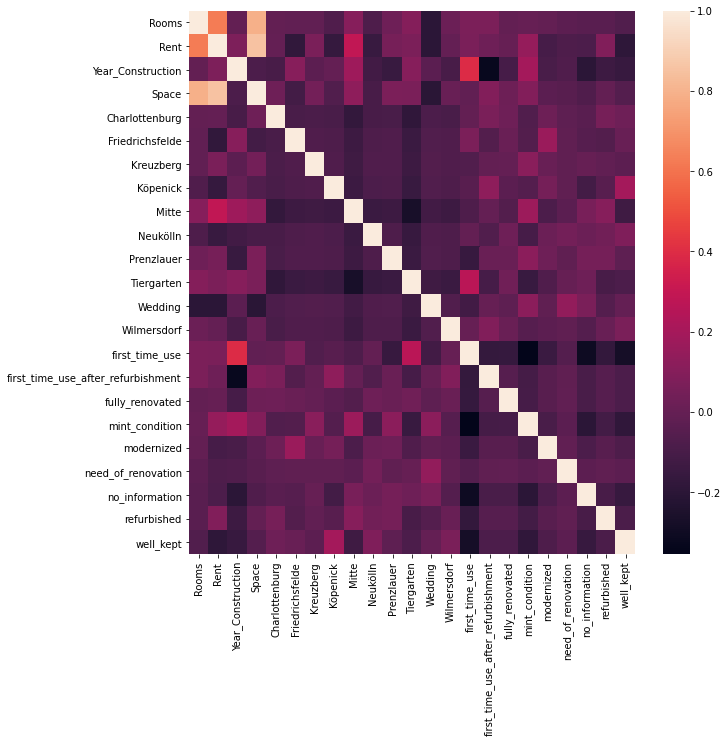

In [333]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlated_df)

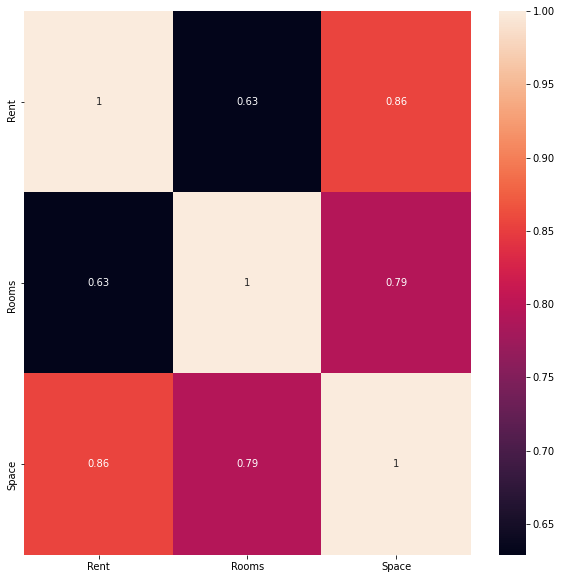

In [334]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[['Rent','Rooms','Space']].corr(),annot=True)

In [335]:
df=df[['Rent','Rooms','Space']]

In [336]:
df.sample(5)

,Rent,Rooms,Space
740,610.00,1.0,21.00
523,921.59,2.0,67.24
747,771.00,1.0,20.50
555,1184.00,3.0,74.31
496,948.10,2.0,75.31


In [337]:
#X=df[['Rooms','Space']]
X=df['Space'].values.reshape(-1,1)
y=df['Rent']

Text(0.5, 1.0, 'relation between rent and space')

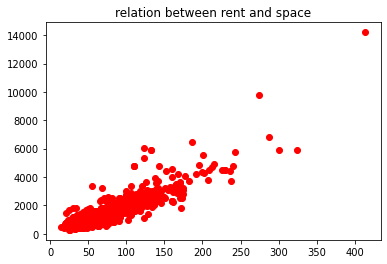

In [338]:
plt.scatter(X,y,color='red',label='space')
#plt.legend()
plt.title('relation between rent and space')
#plt.scatter(X,y,color='green',label='rooms')
#plt.legend()

In [339]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [340]:
model=LinearRegression()

In [341]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [342]:
score=model.score(X_test,y_test)

In [343]:
print('the score of the first model is :',str(score))

the score of the first model is : 0.6924467470233603


In [344]:
df2=df[df['Space']<250]

In [345]:
X2=df2['Space'].values.reshape(-1,1)
y2=df2['Rent']

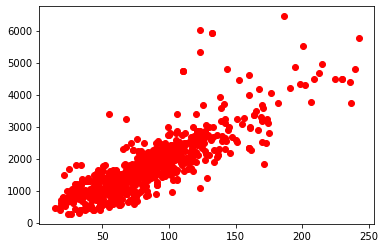

In [346]:
plt.scatter(X2,y2,color='red',label='space')

In [347]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3)

In [348]:
model2=LinearRegression()

In [349]:
model2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [350]:
score2=model2.score(X_test2,y_test2)

In [351]:
print('the score of the second model is :',str(score2))

the score of the second model is : 0.7369766301412115


In [352]:
print('the score of the first model is : {}% \nthe score of the second model is : {}%'.format (str(score)[:4],str(score2)[:4]))

the score of the first model is : 0.69% 
the score of the second model is : 0.73%


In [353]:
df3=df2[df2['Rent']<4000]

In [354]:
X3=df3['Space'].values.reshape(-1,1)
y3=df3['Rent']

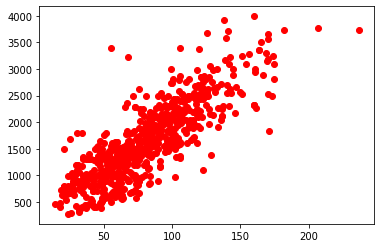

In [355]:
plt.scatter(X3,y3,color='red',label='space')

In [356]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y3,test_size=0.3)

In [357]:
model3=LinearRegression()

In [358]:
model3.fit(X_train3,y_train3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
score3=model3.score(X_test3,y_test3)

In [360]:
print('the score of the third model is :',str(score3))

the score of the third model is : 0.7089671224759474


In [361]:
print('the score of the first model is : {}% \nthe score of the second model is : {}% \nthe score of the third model is : {}%'.format (str(score)[:4],str(score2)[:4],str(score3)[:4]))

the score of the first model is : 0.69% 
the score of the second model is : 0.73% 
the score of the third model is : 0.70%


In [362]:
df4=df3[df3['Space']<180]

In [363]:
X4=df4['Space'].values.reshape(-1,1)
y4=df4['Rent']

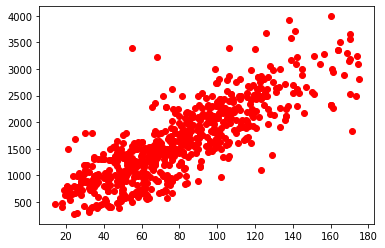

In [364]:
plt.scatter(X4,y4,color='red',label='space')

In [365]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X4,y4,test_size=0.3)

In [366]:
model4=LinearRegression()

In [367]:
model4.fit(X_train4,y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [368]:
score4=model4.score(X_test4,y_test4)

In [369]:
print('the score of the fourth model is :',str(score4))

the score of the fourth model is : 0.6938589334124263


In [370]:
print('the score of the first model is : {}% \nthe score of the second model is : {}% \nthe score of the third model is : {}% \nthe score of the fourth model is : {}%'.format (str(score)[:4],str(score2)[:4],str(score3)[:4],str(score4)[:4]))

the score of the first model is : 0.69% 
the score of the second model is : 0.73% 
the score of the third model is : 0.70% 
the score of the fourth model is : 0.69%


In [374]:
print(model.score(X_test,y_test))
print(model.score(X_test2,y_test2))
print(model.score(X_test3,y_test3))
print(model.score(X_test4,y_test4))

0.6924467470233603
0.7131128047394173
0.6455277059740738
0.644303454068261


In [375]:
print(model2.score(X_test,y_test))
print(model2.score(X_test2,y_test2))
print(model2.score(X_test3,y_test3))
print(model2.score(X_test4,y_test4))

0.7236746944770072
0.7369766301412115
0.6948421135987329
0.6903885996500514


In [376]:
print(model3.score(X_test,y_test))
print(model3.score(X_test2,y_test2))
print(model3.score(X_test3,y_test3))
print(model3.score(X_test4,y_test4))

0.7133476309100301
0.726128331197296
0.7089671224759474
0.6960828093887705


In [377]:
print(model4.score(X_test,y_test))
print(model4.score(X_test2,y_test2))
print(model4.score(X_test3,y_test3))
print(model4.score(X_test4,y_test4))

0.7106453299265043
0.7240185108597907
0.7085892995483879
0.6938589334124263
